In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [17]:
bs_results = []
bs_result_path = 'data/bs_result/bs_result_'


for i in range(1, 7):
    dim_result = pd.read_csv(bs_result_path + str(i) + ' (1).csv')
    
    
    CIs = np.percentile(dim_result, [2.5, 97.5], axis=0)
    means = np.mean(dim_result, axis=0)
    bs_result = pd.DataFrame({'mean': means, 'lower': CIs[0], 'upper': CIs[1]})
    bs_results.append(bs_result)
    
dim_result

,latte,pika,vgen,gen2,videocrafter2
0,0.922603,1.344840,0.828560,2.929174,0.955768
1,0.934014,1.341830,0.808807,2.974026,0.941891
2,0.910424,1.278134,0.792774,2.956201,0.960407
3,0.939398,1.378499,0.831189,2.936896,0.948567
4,0.918021,1.360611,0.836079,2.949225,0.947326
...,...,...,...,...,...
995,0.963116,1.155464,0.828516,2.811527,0.823483
996,0.950499,1.135041,0.840545,2.688901,0.847280
997,0.872499,1.148557,0.938611,3.059695,0.700565
998,0.975422,1.161597,0.884993,2.484322,0.836666


In [19]:
dim_result.rename(columns={'latte': 'Latte', 'pika': 'Pika', 'vgen':'TF-T2V', 'gen2': 'Gen2', 'videocrafter2':'Videocrafter2'}, inplace=True)
dim_result

,Latte,Pika,TF-T2V,Gen2,Videocrafter2
0,0.922603,1.344840,0.828560,2.929174,0.955768
1,0.934014,1.341830,0.808807,2.974026,0.941891
2,0.910424,1.278134,0.792774,2.956201,0.960407
3,0.939398,1.378499,0.831189,2.936896,0.948567
4,0.918021,1.360611,0.836079,2.949225,0.947326
...,...,...,...,...,...
995,0.963116,1.155464,0.828516,2.811527,0.823483
996,0.950499,1.135041,0.840545,2.688901,0.847280
997,0.872499,1.148557,0.938611,3.059695,0.700565
998,0.975422,1.161597,0.884993,2.484322,0.836666


In [ ]:
df_bs_result = pd.DataFrame(columns=['dimension', 'model', 'estimation'])

for i in range(1, 7):
    dim_result = pd.read_csv(bs_result_path + str(i) + ' (1).csv')
    dim_result.rename(columns={'latte': 'Latte', 'pika': 'Pika', 
                               'vgen':'TF-T2V', 'gen2': 'Gen2', 
                               'videocrafter2':'Videocrafter2'}, inplace=True)
    dim_result = dim_result.melt(var_name='model', value_name='estimation')
    dim_result['dimension'] = i
    df_bs_result = pd.concat([df_bs_result, dim_result])
    
df_bs_result

In [12]:
from pyperclip import copy
copy(df_bs_result.head().to_latex(index=False))

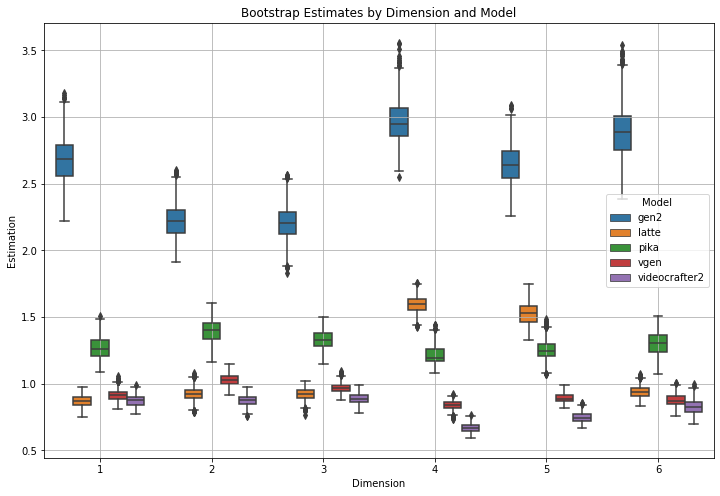

In [15]:
# 使用 seaborn 的 boxplot 函数绘制箱型图
plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(x='dimension', y='estimation', hue='model', data=df_bs_result)

# 添加一些图形格式化选项
plt.title('Bootstrap Estimates by Dimension and Model')  # 设置标题
plt.xlabel('Dimension')  # 设置X轴标签
plt.ylabel('Estimation')  # 设置Y轴标签
plt.legend(title='Model')  # 设置图例标题
plt.grid(True)  # 添加网格线

# 展示图形
plt.show()

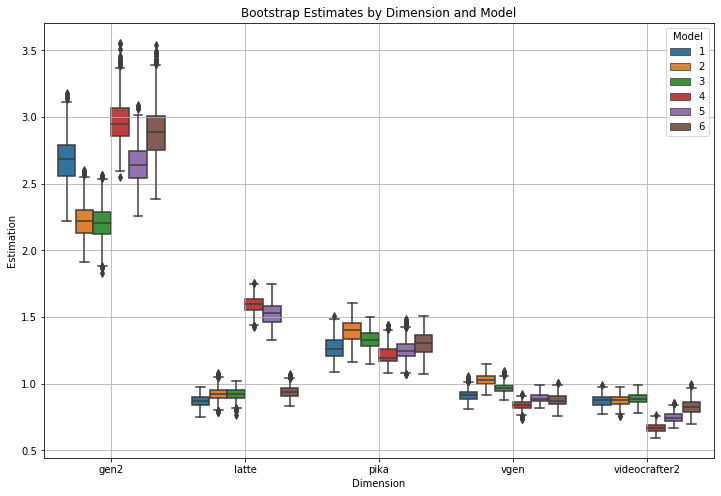

In [16]:
# 使用 seaborn 的 boxplot 函数绘制箱型图
plt.figure(figsize=(12, 8))  # 设置图形大小
sns.boxplot(x='model', y='estimation', hue='dimension', data=df_bs_result)

# 添加一些图形格式化选项
plt.title('Bootstrap Estimates by Dimension and Model')  # 设置标题
plt.xlabel('Dimension')  # 设置X轴标签
plt.ylabel('Estimation')  # 设置Y轴标签
plt.legend(title='Model')  # 设置图例标题
plt.grid(True)  # 添加网格线

# 展示图形
plt.show()

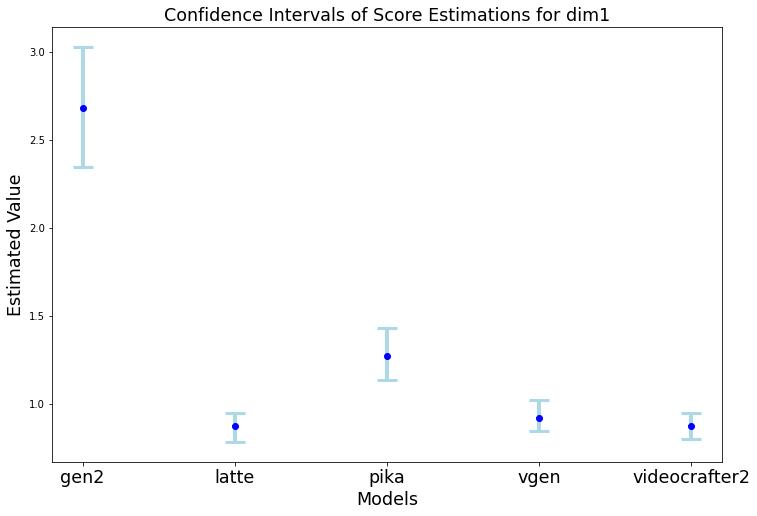

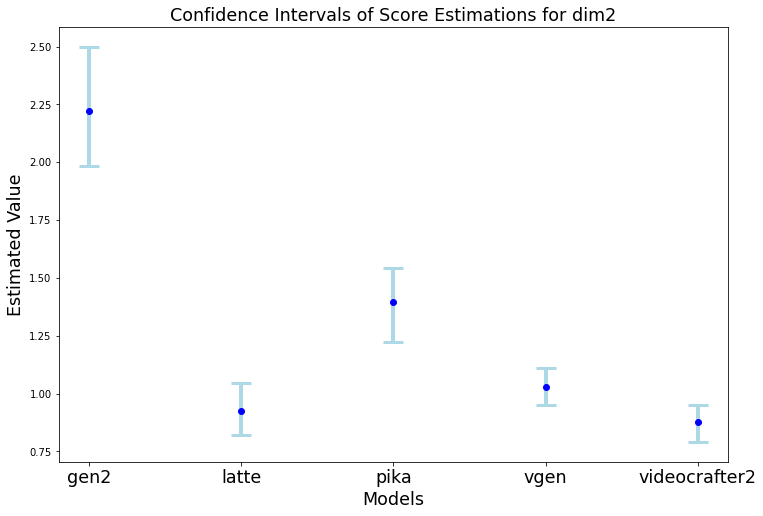

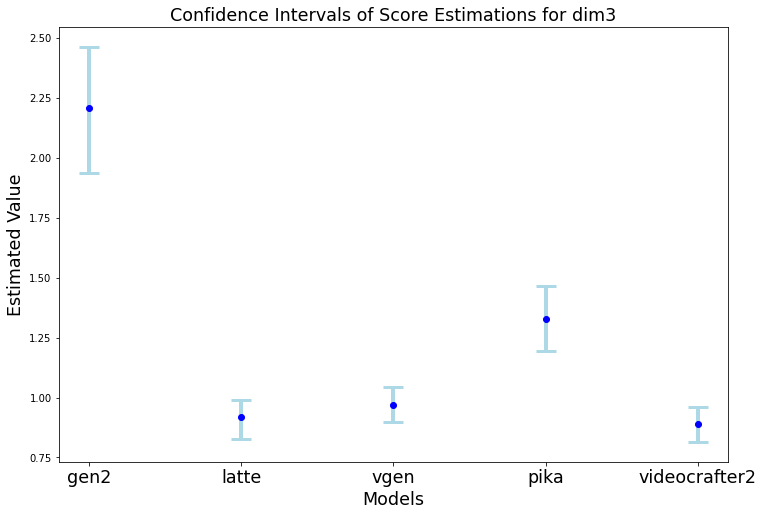

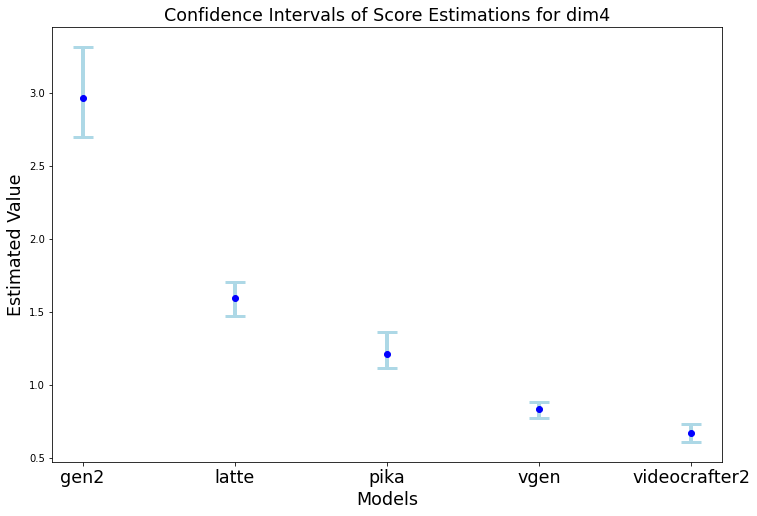

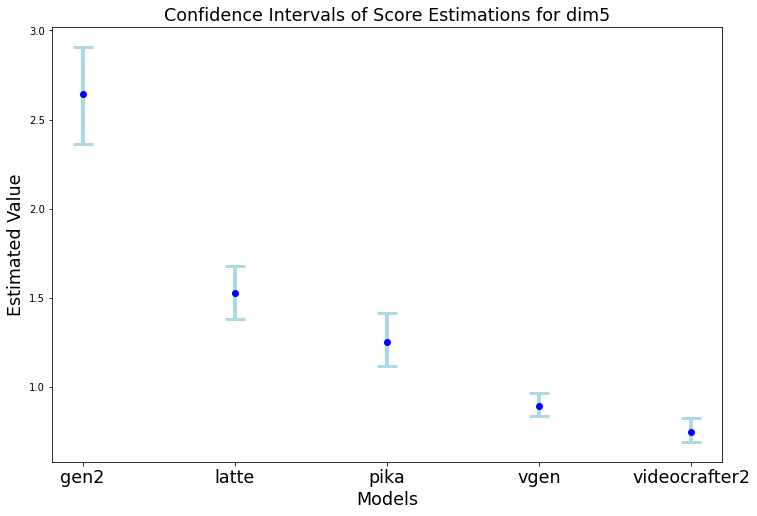

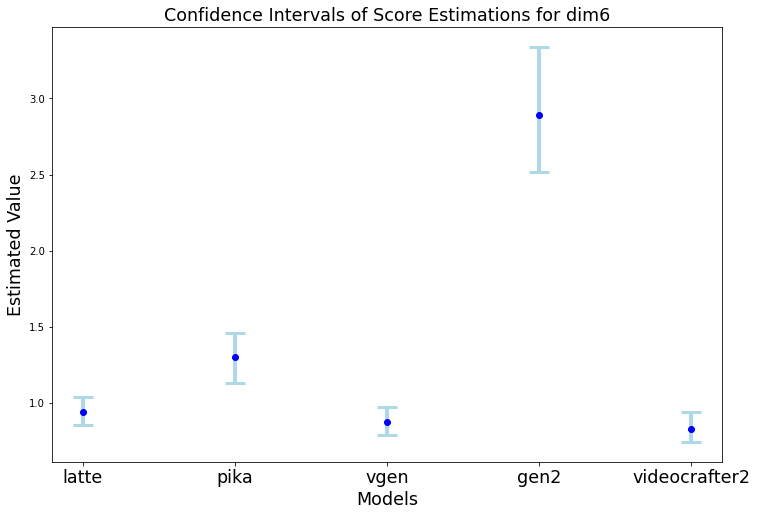

In [5]:
i = 1
for result in bs_results:
    fontsize = 17.5

    plt.figure(figsize=(12, 8))

    plt.errorbar(result.index, result['mean'], 
                yerr=[result['mean'] - result['lower'], 
                    result['upper'] - result['mean']],
                fmt='o', color='b', ecolor='lightblue', elinewidth=4, capsize=10, capthick=3)

    # plt.axhline(y=ref_edu_results.loc['Complete', 'mean'], color='r', linestyle='--', label='Complete Estimate')
    # plt.axhline(y=ref_edu_results.loc['Complete', 'lower'], color='orange', linestyle='--', label='Complete Lower CI')
    # plt.axhline(y=ref_edu_results.loc['Complete', 'upper'], color='orange', linestyle='--', label='Complete Upper CI')

    plt.xlabel('Models', fontsize=fontsize)
    plt.ylabel('Estimated Value', fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.title('Confidence Intervals of Score Estimations for dim%d'%i, fontsize=fontsize)
    # plt.legend(fontsize=fontsize)
    #mkdir if not exist
    if not os.path.exists('figures'):
        os.makedirs('figures')
    plt.savefig('figures/bs_result_dim%d.png'%i)
    i += 1